In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F #this gives relu()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image,display


In [2]:
torch.__version__

'2.6.0'

In [11]:
import logging
import coloredlogs

In [ ]:
logging.basicConfig(level=print)
coloredlogs.install()

##### Create pre-trained NN using PyTorch
 - uses nn module, 
 - - __init__() method to initialize verious parts of NN
 - - forward() runs the values through NN

 ![NN](ch1_nn.png)

In [21]:
display(Image(url='ch1_nn.png'))

In [46]:
class myNN(nn.Module):
    def __init__(self):
        super().__init__() # when we inherit a call we always call init of super class to check if nitialization logic in nn.Module runs properly 

        self.w1 = torch.tensor(1.43)
        self.b1 = torch.tensor(-0.61)

        self.w2 = torch.tensor(2.63)
        self.b2 = torch.tensor(-0.27)
        
        self.w3 = torch.tensor(-3.89)
        self.w4 = torch.tensor(1.35)

    def forward(self, input_values):
        #this is called by default when we pass values to object created from this class
        # this is where we do the maths related to NN

        print(f"w1 : {self.w1}, b1:{self.b1}, w2:{self.w2}, b2:{self.b2}, w3:{self.w3}, w4:{self.w4}")
        print(f'input :: {input_values}')

        print('(input_values * self.w1) : ',(input_values * self.w1))

        top_x_axis_values = (input_values * self.w1) + self.b1
        print('adding self.b1',top_x_axis_values)
        
        bottom_x_axis_values = (input_values * self.w2) + self.b2
        print('(input_values * self.w2) : ',(input_values * self.w2))
        print('adding self.b2',bottom_x_axis_values)


        top_y_axis_values = F.relu(top_x_axis_values)
        bottom_y_axis_values = F.relu(bottom_x_axis_values)
        print(top_y_axis_values,bottom_y_axis_values)


        output_values = (top_y_axis_values * self.w3 )+ (bottom_y_axis_values * self.w4)
        return output_values
    


In [47]:
model = myNN()

In [48]:
doses = torch.tensor([0.0, 0.5, 1.0])
doses

tensor([0.0000, 0.5000, 1.0000])

In [49]:
model(doses)

w1 : 1.4299999475479126, b1:-0.6100000143051147, w2:2.630000114440918, b2:-0.27000001072883606, w3:-3.890000104904175, w4:1.350000023841858
input :: tensor([0.0000, 0.5000, 1.0000])
(input_values * self.w1) :  tensor([0.0000, 0.7150, 1.4300])
adding self.b1 tensor([-0.6100,  0.1050,  0.8200])
(input_values * self.w2) :  tensor([0.0000, 1.3150, 2.6300])
adding self.b2 tensor([-0.2700,  1.0450,  2.3600])
tensor([0.0000, 0.1050, 0.8200]) tensor([0.0000, 1.0450, 2.3600])


tensor([ 0.0000,  1.0023, -0.0038])

In [53]:
F.relu(torch.tensor(-0.100))# keeps value above 0

tensor(0.)

In [55]:
F.sigmoid(torch.tensor(.9))# keeps value between 0 and 1

tensor(0.7109)

In [68]:
torch.round(model(doses), decimals=2)

w1 : 1.4299999475479126, b1:-0.6100000143051147, w2:2.630000114440918, b2:-0.27000001072883606, w3:-3.890000104904175, w4:1.350000023841858
input :: tensor([0.0000, 0.5000, 1.0000])
(input_values * self.w1) :  tensor([0.0000, 0.7150, 1.4300])
adding self.b1 tensor([-0.6100,  0.1050,  0.8200])
(input_values * self.w2) :  tensor([0.0000, 1.3150, 2.6300])
adding self.b2 tensor([-0.2700,  1.0450,  2.3600])
tensor([0.0000, 0.1050, 0.8200]) tensor([0.0000, 1.0450, 2.3600])


tensor([0., 1., -0.])

In [69]:
model(doses)

w1 : 1.4299999475479126, b1:-0.6100000143051147, w2:2.630000114440918, b2:-0.27000001072883606, w3:-3.890000104904175, w4:1.350000023841858
input :: tensor([0.0000, 0.5000, 1.0000])
(input_values * self.w1) :  tensor([0.0000, 0.7150, 1.4300])
adding self.b1 tensor([-0.6100,  0.1050,  0.8200])
(input_values * self.w2) :  tensor([0.0000, 1.3150, 2.6300])
adding self.b2 tensor([-0.2700,  1.0450,  2.3600])
tensor([0.0000, 0.1050, 0.8200]) tensor([0.0000, 1.0450, 2.3600])


tensor([ 0.0000,  1.0023, -0.0038])

#### Draw graph of output for the given tensor input doses above

In [56]:
## create different doses that we want to create through this NN
## linspace creates seq of no between given range including 0 and 1
input_doses = torch.linspace(0,1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [58]:
# now multuply the doses by w1 and add b1 for top activatation function
top_x_axis_values = (input_doses * model.w1 )+ model.b1
top_x_axis_values

tensor([-0.6100, -0.4670, -0.3240, -0.1810, -0.0380,  0.1050,  0.2480,  0.3910,
         0.5340,  0.6770,  0.8200])

In [59]:
bottom_x_values = (input_doses * model.w2 )+ model.b2
bottom_x_values

tensor([-0.2700, -0.0070,  0.2560,  0.5190,  0.7820,  1.0450,  1.3080,  1.5710,
         1.8340,  2.0970,  2.3600])

In [60]:
top_y_values = F.relu(top_x_axis_values)
top_y_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1050, 0.2480, 0.3910, 0.5340,
        0.6770, 0.8200])

In [61]:
bottom_y_values = F.relu(bottom_x_values)
bottom_y_values

tensor([0.0000, 0.0000, 0.2560, 0.5190, 0.7820, 1.0450, 1.3080, 1.5710, 1.8340,
        2.0970, 2.3600])

<Axes: xlabel='None', ylabel='None'>

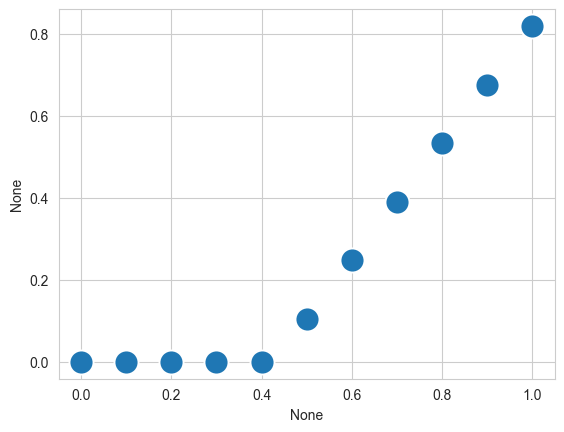

In [ ]:
## now draw graph of input and y axis ouput using seaborn
sns.set_style('whitegrid')

sns.scatterplot(x=input_doses,y=top_y_values, s=200)

<Axes: xlabel='None', ylabel='None'>

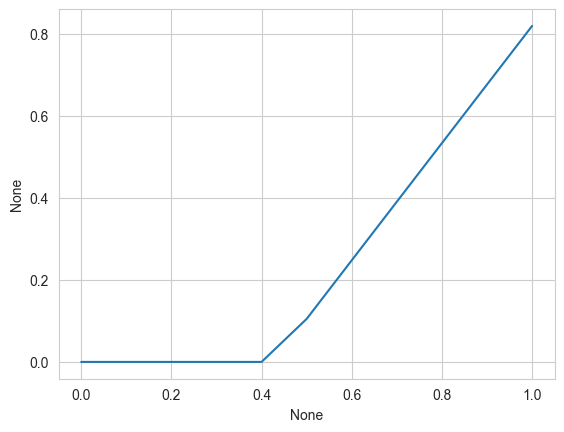

In [ ]:
sns.lineplot(x=input_doses,y=top_y_values)

Text(0.5, 0, 'doses')

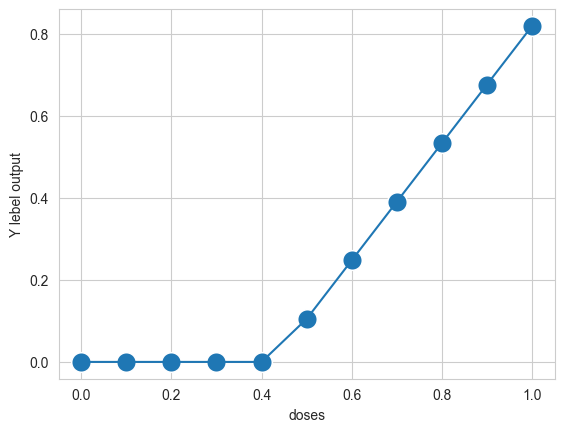

In [70]:
#combining above in one

sns.scatterplot(x=input_doses,y=top_y_values, s=200)
sns.lineplot(x=input_doses,y=top_y_values)
plt.ylabel('Y lebel output')
plt.xlabel('doses')

##### Draw a graph of output from top and bottom activation functions 

Text(0.5, 0, 'doses')

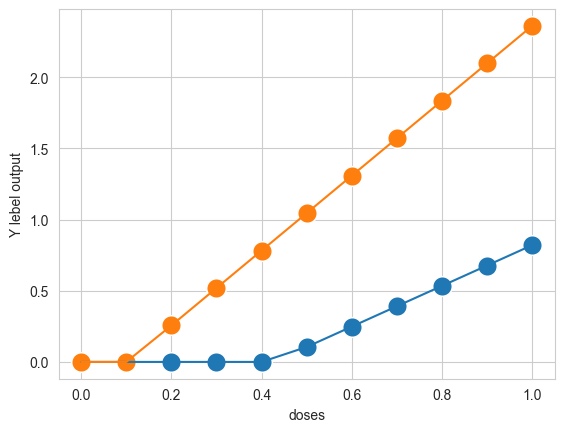

In [77]:
sns.scatterplot(x=input_doses,y=top_y_values, s=200)
sns.lineplot(x=input_doses,y=top_y_values)
sns.scatterplot(x=input_doses,y=bottom_y_values, s=200)
sns.lineplot(x=input_doses,y=bottom_y_values)
plt.ylabel('Y lebel output')
plt.xlabel('doses')

##### Now scetch the bend shapes by scaling them to final weights in NN

In [72]:
final_top_y_values = top_y_values * model.w3
final_bottom_y_values = bottom_y_values * model.w4
final_top_y_values,final_bottom_y_values

(tensor([-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.4084, -0.9647, -1.5210,
         -2.0773, -2.6335, -3.1898]),
 tensor([0.0000, 0.0000, 0.3456, 0.7007, 1.0557, 1.4108, 1.7658, 2.1209, 2.4759,
         2.8310, 3.1860]))

Text(0.5, 0, 'Dose')

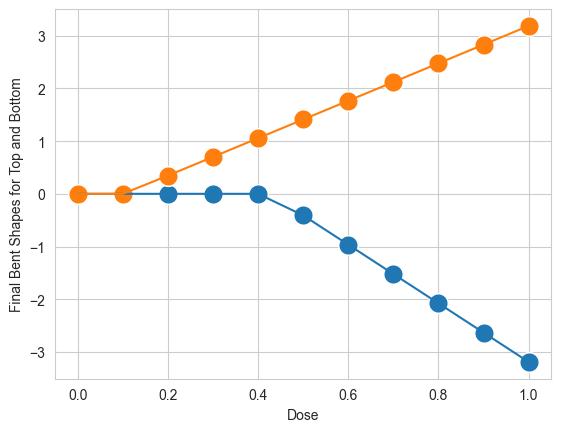

In [78]:
sns.scatterplot(x=input_doses,y=final_top_y_values, s=200)
sns.lineplot(x=input_doses,y=final_top_y_values)
sns.scatterplot(x=input_doses,y=final_bottom_y_values, s=200)
sns.lineplot(x=input_doses,y=final_bottom_y_values)
plt.ylabel('Final Bent Shapes for Top and Bottom')
plt.xlabel('Dose')

#### Lastly, show the final bent shape after adding the 2 top and bottom bent shapes

In [79]:
final_bent_shape = final_bottom_y_values + final_top_y_values
final_bent_shape

tensor([ 0.0000,  0.0000,  0.3456,  0.7007,  1.0557,  1.0023,  0.8011,  0.5999,
         0.3986,  0.1974, -0.0038])

Text(0.5, 0, 'Dose')

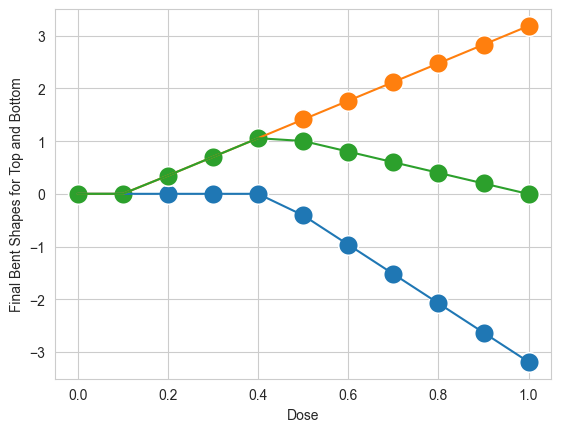

In [80]:
sns.scatterplot(x=input_doses,y=final_top_y_values, s=200)
sns.lineplot(x=input_doses,y=final_top_y_values)
sns.scatterplot(x=input_doses,y=final_bottom_y_values, s=200)
sns.lineplot(x=input_doses,y=final_bottom_y_values)
sns.scatterplot(x=input_doses,y=final_bent_shape, s=200)
sns.lineplot(x=input_doses,y=final_bent_shape)
plt.ylabel('Final Bent Shapes for Top and Bottom')
plt.xlabel('Dose')